In [147]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
# make it easier to understand by importing the required libraries within keras
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [148]:
# I converted the txt file into CSV for easy data reading
import pandas as pd
df = pd.read_csv('data.csv', sep=',', header=None)
data = df.values
print(data.shape)

(178, 14)


In [149]:
# first column are Y(output) values and remaining columns are (X) input values
X = data[:,1:]
Y = data[:,0] 
Y=Y.astype(int)
# print(X)
# print(Y)

In [150]:
# Normalizing both input and output
Y = Y-1
Y=Y.astype(int)
min_values = np.min(X, axis=0)
max_values = np.max(X, axis=0)
X = (X - min_values) / (max_values - min_values)
# print(X.shape)
# print(Y)

In [151]:
# Spliting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,shuffle=True)
print('Training set shape: {}'.format(X_train.shape))
print('Training set shape: {}'.format(Y_train.shape))


Training set shape: (133, 13)
Training set shape: (133,)


In [152]:
# one hot encoding
Y_train = keras.utils.to_categorical(Y_train, num_classes=3)
Y_test = keras.utils.to_categorical(Y_test, num_classes=3)


train acc: 100.00 % 
val acc: 100.00 %


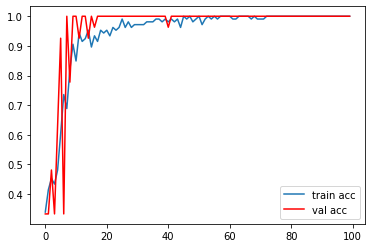

In [153]:
# Perfect Model
model = keras.models.Sequential([
  Dense(64, activation='sigmoid', input_shape=(13,),name='hidden1'),
  Dense(64, activation='sigmoid',name='hidden2'),
  Dense(3, activation='softmax',name='output')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h = model.fit(X_train, Y_train, epochs=100, batch_size=1, validation_split=0.2, verbose=0, shuffle=True)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'], 'r')
plt.legend(['train acc', 'val acc'])
print('train acc: %.2f %% \nval acc: %.2f %%'%(h.history['accuracy'][-1]*100,h.history['val_accuracy'][-1]*100))

train loss: 0.01 
val loss: 0.00
2/2 [==============================] - 0s 5ms/step
[[13  0  0]
 [ 0 17  0]
 [ 0  1 14]]


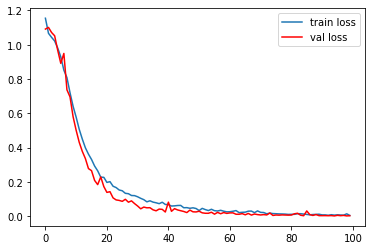

In [154]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'], 'r')
plt.legend(['train loss', 'val loss'])
print('train loss: %.2f \nval loss: %.2f'%(h.history['loss'][-1],h.history['val_loss'][-1]))

# Confusion Matrix

Y_predict = np.argmax(model.predict(X_test),axis=1)
Y_actual  = np.argmax(Y_test, axis=1)
Confusion_matrix = confusion_matrix(Y_actual,Y_predict)
print(Confusion_matrix)

train acc: 100.00 % 
val acc: 88.89 %


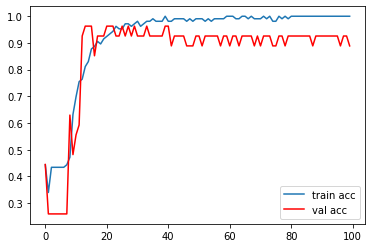

In [137]:
# Model # 2
model = keras.models.Sequential([
  Dense(32, activation='sigmoid', input_shape=(13,),name='hidden1'),
  Dense(64, activation='sigmoid',name='hidden2'),
  Dense(32, activation='sigmoid',name='hidden3'),
  Dense(3, activation='softmax',name='output')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h = model.fit(X_train, Y_train, epochs=100, batch_size=1, validation_split=0.2, verbose=0,shuffle=True)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'], 'r')
plt.legend(['train acc', 'val acc'])
print('train acc: %.2f %% \nval acc: %.2f %%'%(h.history['accuracy'][-1]*100,h.history['val_accuracy'][-1]*100))

train loss: 0.00 
val loss: 0.24
2/2 [==============================] - 0s 5ms/step
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


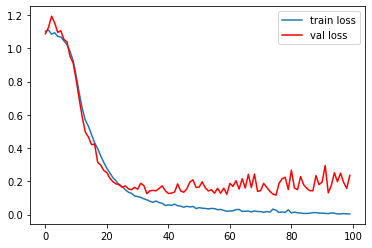

In [138]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'], 'r')
plt.legend(['train loss', 'val loss'])
print('train loss: %.2f \nval loss: %.2f'%(h.history['loss'][-1],h.history['val_loss'][-1]))

# Confusion Matrix

Y_predict = np.argmax(model.predict(X_test),axis=1)
Y_actual  = np.argmax(Y_test, axis=1)
Confusion_matrix = confusion_matrix(Y_actual,Y_predict)
print(Confusion_matrix)

train acc: 100.00 % 
val acc: 92.59 %


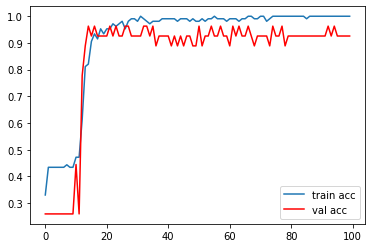

In [139]:
# Model # 3 Hidden nodes (powers of 2)
model = keras.models.Sequential([
  Dense(32, activation='sigmoid', input_shape=(13,),name='hidden1'),
  Dense(64, activation='sigmoid',name='hidden2'),
  Dense(32, activation='sigmoid',name='hidden3'),
  Dense(16, activation='sigmoid',name='hidden4'),
  Dense(3, activation='softmax',name='output')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h = model.fit(X_train, Y_train, epochs=100, batch_size=1, validation_split=0.2, verbose=0,shuffle=True)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'], 'r')
plt.legend(['train acc', 'val acc'])
print('train acc: %.2f %% \nval acc: %.2f %%'%(h.history['accuracy'][-1]*100,h.history['val_accuracy'][-1]*100))

train loss: 0.00 
val loss: 0.19
2/2 [==============================] - 0s 5ms/step
[[16  0  0]
 [ 0 18  0]
 [ 0  1 10]]


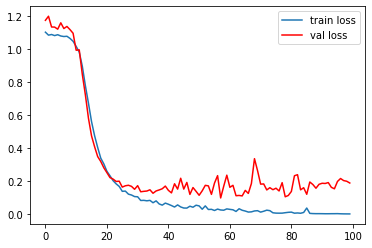

In [140]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'], 'r')
plt.legend(['train loss', 'val loss'])
print('train loss: %.2f \nval loss: %.2f'%(h.history['loss'][-1],h.history['val_loss'][-1]))
# Confusion Matrix

Y_predict = np.argmax(model.predict(X_test),axis=1)
Y_actual  = np.argmax(Y_test, axis=1)
Confusion_matrix = confusion_matrix(Y_actual,Y_predict)
print(Confusion_matrix)

train acc: 99.06 % 
val acc: 96.30 %


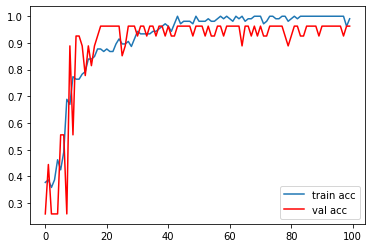

In [141]:
# Model 4 Hidden nodes (powers of 2)
model = keras.models.Sequential([
  Dense(32, activation='sigmoid', input_shape=(13,),name='hidden1'),
  Dense(128, activation='sigmoid',name='hidden2'),
  Dense(64, activation='sigmoid',name='hidden3'),
  Dense(3, activation='softmax',name='output')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h = model.fit(X_train, Y_train, epochs=100, batch_size=1, validation_split=0.2, verbose=0,shuffle=True)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'], 'r')
plt.legend(['train acc', 'val acc'])
print('train acc: %.2f %% \nval acc: %.2f %%'%(h.history['accuracy'][-1]*100,h.history['val_accuracy'][-1]*100))

train loss: 0.04 
val loss: 0.10
2/2 [==============================] - 0s 4ms/step
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


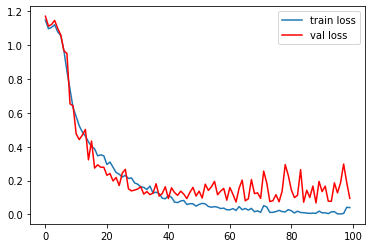

In [142]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'], 'r')
plt.legend(['train loss', 'val loss'])
print('train loss: %.2f \nval loss: %.2f'%(h.history['loss'][-1],h.history['val_loss'][-1]))

# Confusion Matrix

Y_predict = np.argmax(model.predict(X_test),axis=1)
Y_actual  = np.argmax(Y_test, axis=1)
Confusion_matrix = confusion_matrix(Y_actual,Y_predict)
print(Confusion_matrix)

train acc: 100.00 % 
val acc: 92.59 %


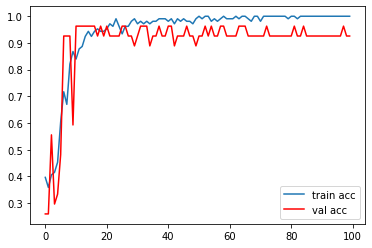

In [143]:
# Model 5 Hidden nodes (powers of 2)
model = keras.models.Sequential([
  Dense(64, activation='sigmoid', input_shape=(13,),name='hidden1'),
  Dense(128, activation='sigmoid',name='hidden2'),
  Dense(3, activation='softmax',name='output')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h = model.fit(X_train, Y_train, epochs=100, batch_size=1, validation_split=0.2, verbose=0,shuffle=True)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'], 'r')
plt.legend(['train acc', 'val acc'])
print('train acc: %.2f %% \nval acc: %.2f %%'%(h.history['accuracy'][-1]*100,h.history['val_accuracy'][-1]*100))

train loss: 0.01 
val loss: 0.10
2/2 [==============================] - 0s 6ms/step
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


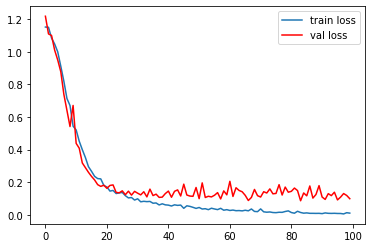

In [144]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'], 'r')
plt.legend(['train loss', 'val loss'])
print('train loss: %.2f \nval loss: %.2f'%(h.history['loss'][-1],h.history['val_loss'][-1]))

# Confusion Matrix

Y_predict = np.argmax(model.predict(X_test),axis=1)
Y_actual  = np.argmax(Y_test, axis=1)
Confusion_matrix = confusion_matrix(Y_actual,Y_predict)
print(Confusion_matrix)

train acc: 100.00 % 
val acc: 92.59 %


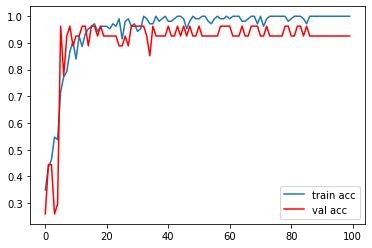

In [145]:
# Model 6 Hidden nodes (powers of 2)
model = keras.models.Sequential([
  Dense(128, activation='sigmoid', input_shape=(13,),name='hidden1'),
  Dense(256, activation='sigmoid',name='hidden2'),
  Dense(3, activation='softmax',name='output')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h = model.fit(X_train, Y_train, epochs=100, batch_size=1, validation_split=0.2, verbose=0,shuffle=True)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'], 'r')
plt.legend(['train acc', 'val acc'])
print('train acc: %.2f %% \nval acc: %.2f %%'%(h.history['accuracy'][-1]*100,h.history['val_accuracy'][-1]*100))

train loss: 0.00 
val loss: 0.20
2/2 [==============================] - 0s 4ms/step
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


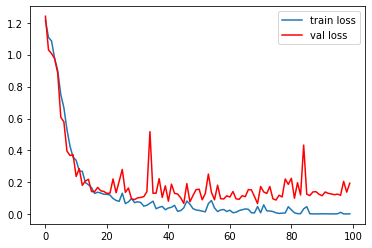

In [146]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'], 'r')
plt.legend(['train loss', 'val loss'])
print('train loss: %.2f \nval loss: %.2f'%(h.history['loss'][-1],h.history['val_loss'][-1]))

# Confusion Matrix

Y_predict = np.argmax(model.predict(X_test),axis=1)
Y_actual  = np.argmax(Y_test, axis=1)
Confusion_matrix = confusion_matrix(Y_actual,Y_predict)
print(Confusion_matrix)

In [ ]:
# evaluating the perfect model on Test data
Test = model.evaluate(X_test,Y_test)
Test

2/2 [==============================] - 0s 7ms/step - loss: 0.2040 - accuracy: 0.9333


[0.2040105015039444, 0.9333333373069763]

In [155]:
# making predictions with the perfect model
Predicting = np.array([[13.72, 1.43, 2.5, 16.7, 108, 3.4, 3.67, 0.19, 2.04, 6.8, 0.89, 2.87, 1285],
[12.04, 4.3, 2.38, 22, 80, 2.1, 1.75, 0.42, 1.35, 2.6, 0.79, 2.57, 580],
[14.13, 4.1, 2.74, 24.5, 96, 2.05, 0.76, 0.56, 1.35, 9.2, 0.61, 1.6, 560]])

# Converting the array into normalize values
min_values = np.min(Predicting, axis=0)
max_values = np.max(Predicting, axis=0)
Predicting = (Predicting - min_values) / (max_values - min_values)


In [156]:
# prediction made here
prediction = model.predict(Predicting)

# Converting the output value into 1 and 0 format
# where 1 indicates the prediction made and the column index of the array represents the product
row_max = np.amax(prediction, axis=1)
arr = np.where(prediction == row_max[:, np.newaxis], 1, 0)
print(arr)


1/1 [==============================] - 0s 31ms/step
[[1 0 0]
 [0 1 0]
 [0 0 1]]
